# Lotka-Volterra

## Introduction 

The Lotka-Volterra equations, also known as the predator-prey equations, are a set of ordinary differential equations that describe the dynamics of a biological system in which two species interact, one as the predator and the other as the prey. This model was developed independently by Alfred J. Lotka and Vito Volterra in the early 1900s.

In this notebook, I will explore the behavior of the Lotka-Volterra system and plot its vector field, phase portrait, and invariant curves using Python.

## Importing the necessary libraries

We start by importing the libraries we will need for this notebook:

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

- **NumPy** is a library for numerical computing in Python. We will use it to generate arrays and perform mathematical operations on them.
- **Matplotlib** is a library for creating static, animated, and interactive visualizations in Python. We will use it to plot our results.
- **SciPy** is a library for scientific computing in Python. We will use it to solve our differential equations using the odeint function.

## Defining the Lotka-Volterra equations

We define a function lotka_volterra that takes as input the current values of the prey and predator populations, time, and the four parameters a, b, c, and d. This function returns the rate of change of the prey and predator populations, which are given by the Lotka-Volterra equations:

$$ \dot{u} = au - buv \\
\dot{v} = -cv + duv $$

where u represents the prey population, v represents the predator population, a is the natural growth rate of the prey, b is the death rate of the prey due to predation, c is the natural death rate of the predator, and d is the efficiency of converting prey into predator offspring.

## Setting the parameter values

We set the values of the parameters a, b, c, and d to some arbitrary values:

In [9]:
a = 2
b = 1
c = 1
d = 1

## Plotting the vector field

We create a grid of U and V values using np.meshgrid and calculate the corresponding rates of change using lotka_volterra. We normalize the rates of change by dividing them by their magnitude to get the direction of the arrows. We plot the vector field using plt.quiver.

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in true_divide
  after removing the cwd from sys.path.


Text(0.5, 1.0, 'Lotka-Volterra System Vector Field')

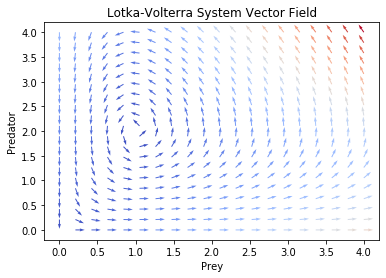

In [10]:
U, V = np.meshgrid(np.linspace(0, 4, 20), np.linspace(0, 4, 20))
dU, dV = lotka_volterra([U, V], 0, a, b, c, d)
M = np.hypot(dU, dV)
plt.quiver(U, V, dU/M, dV/M, M, cmap=plt.cm.coolwarm)
plt.xlabel('Prey')
plt.ylabel('Predator')
plt.title('Lotka-Volterra System Vector Field')

This gives us a visual representation of how the populations of the two species will change over time.

## Plotting the phase portrait

We use the scipy.integrate.odeint function to numerically solve the Lotka-Volterra equations for a range of initial conditions. We then plot the resulting prey and predator population values as a function of time. The resulting plot shows the trajectory of the prey-predator system in the phase space, and reveals the qualitative behavior of the system over time.

Text(0.5, 1.0, 'Lotka-Volterra Phase Portrait')

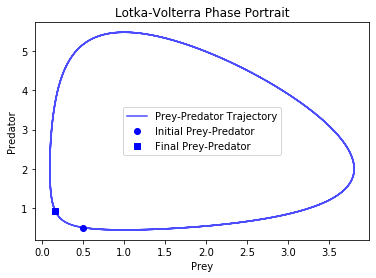

In [12]:
# Plot phase portrait
t = np.linspace(0, 15, 1000)
y0 = [0.5, 0.5]
y = odeint(lotka_volterra, y0, t, args=(a, b, c, d))
plt.figure()
plt.plot(y[:,0], y[:,1], 'b-', alpha=0.7, label='Prey-Predator Trajectory')
plt.plot(y[0,0], y[0,1], 'bo', label='Initial Prey-Predator')
plt.plot(y[-1,0], y[-1,1], 'bs', label='Final Prey-Predator')
plt.legend(loc='best')
plt.xlabel('Prey')
plt.ylabel('Predator')
plt.title('Lotka-Volterra Phase Portrait')

## Plotting the invariant curves

We define a function that calculates the system's invariant quantity (related to the system's energy), and then use this function to compute the invariant value for a grid of prey and predator values. We then plot the resulting invariant curves using plt.contour. The resulting plot shows the curves in the phase space that correspond to a constant value of the invariant quantity, and reveals the level sets of the system's energy.

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in log
  after removing the cwd from sys.path.


Text(0.5, 1.0, 'Lotka-Volterra Invariant Curves')

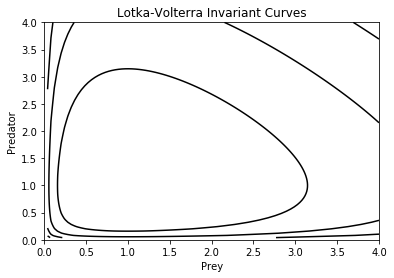

In [14]:
# Plot invariants
def invariant(y):
    u, v = y
    return np.log(u) - b*u + np.log(v) - v

x = np.linspace(0, 4, 100)
y = np.linspace(0, 4, 100)
X, Y = np.meshgrid(x, y)
Z = invariant([X, Y])
plt.figure()
plt.contour(X, Y, Z, levels=np.arange(-6, 7), colors='k', linestyles='solid')
plt.xlabel('Prey')
plt.ylabel('Predator')
plt.title('Lotka-Volterra Invariant Curves')

## References 
- "The Lotka-Volterra Predator-Prey Model" on Scholarpedia: https://www.scholarpedia.org/article/Lotka-Volterra_predator-prey_model
- "Dynamics and Bifurcations" chapter in "Nonlinear Dynamics and Chaos" by Strogatz: https://www.stevenstrogatz.com/books/nonlinear-dynamics-and-chaos-with-applications-to-physics-biology-chemistry-and-engineering/
- Documentation for the NumPy, Matplotlib, and SciPy libraries:
 - NumPy: https://numpy.org/doc/stable/
 - Matplotlib: https://matplotlib.org/stable/contents.html
 - SciPy: https://docs.scipy.org/doc/scipy/reference/